# Capstone 3: preprocessing and training, modeling Notebook – Teledermatology Project 
**Goal:** Preprocess metadata and train baseline classification models using HAM10000 dataset to detect skin lesion types from metadata and images.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the cleansed metadata
metadata = pd.read_csv('/Users/manuelramirez/Documents/teledermatology project/cleansed_HAM10000_metadata.csv')
metadata.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0


In [3]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(metadata, columns=['sex', 'localization', 'dx_type'], drop_first=True)

# Drop non-feature columns
X = df.drop(columns=['lesion_id', 'image_id', 'dx', 'label'])
y = df['label']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [4]:
# Train logistic regression model as baseline
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.44      0.49      0.46       220
           1       0.80      0.94      0.86      1341
           2       0.20      0.09      0.12        23
           3       0.25      0.17      0.20       223
           4       0.00      0.00      0.00        28
           5       0.29      0.07      0.11       103
           6       0.67      0.03      0.06        65

    accuracy                           0.71      2003
   macro avg       0.38      0.25      0.26      2003
weighted avg       0.65      0.71      0.66      2003



In [5]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.49      0.44      0.46       220
           1       0.82      0.94      0.87      1341
           2       0.36      0.17      0.24        23
           3       0.32      0.25      0.28       223
           4       0.64      0.25      0.36        28
           5       0.30      0.17      0.22       103
           6       0.30      0.09      0.14        65

    accuracy                           0.72      2003
   macro avg       0.46      0.33      0.37      2003
weighted avg       0.68      0.72      0.69      2003



##  Model Evaluation and Selection

- Logistic Regression serves as a linear, interpretable baseline.
- Random Forest adds non-linearity and generally handles feature interactions better.

We'll compare metrics such as **accuracy**, **precision**, **recall**, and **F1-score** to determine which model performs best across multiple classes.

> Next steps could include CNN modeling using images, integrating both image and metadata, and hyperparameter tuning (e.g., GridSearchCV).


##  CNN Model for Image Classification

To complement our baseline models using metadata, we now train a Convolutional Neural Network (CNN) using image data from the HAM10000 dataset. This model aims to classify skin lesion types directly from lesion images.


In [7]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import os


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 8.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 9.0 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 9.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 5.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


2025-05-05 19:05:04.427147: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Define image parameters
IMG_SIZE = 64
BATCH_SIZE = 32

# Define paths
image_dir_1 = 'HAM10000_images_part_1'
image_dir_2 = 'HAM10000_images_part_2'

# Combine image paths into a new directory if needed
combined_image_dir = 'HAM10000_all_images'
os.makedirs(combined_image_dir, exist_ok=True)

# Copy all images into one folder if not already done
import shutil
for folder in [image_dir_1, image_dir_2]:
    for img_file in os.listdir(folder):
        src = os.path.join(folder, img_file)
        dst = os.path.join(combined_image_dir, img_file)
        if not os.path.exists(dst):
            shutil.copy(src, dst)

# Merge image paths into dataframe
metadata['image_path'] = metadata['image_id'].apply(lambda x: os.path.join(combined_image_dir, f"{x}.jpg"))


In [9]:
# Convert labels to string for Keras
metadata['label_str'] = metadata['label'].astype(str)

# Split into training and validation sets
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(metadata[['image_path', 'label_str']], test_size=0.2, stratify=metadata['label_str'], random_state=42)

# Image generators
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label_str',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label_str',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


In [14]:
# Build CNN model
num_classes = len(train_gen.class_indices)
Dense(num_classes, activation='softmax')
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')

])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,439 (6.20 MB)

 Trainable params: 1,626,247 (6.20 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 126s 486ms/step - accuracy: 0.5557 - loss: 2.4664 - val_accuracy: 0.1358 - val_loss: 2.3514
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 129s 515ms/step - accuracy: 0.6622 - loss: 1.0724 - val_accuracy: 0.6520 - val_loss: 1.4562
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 173s 689ms/step - accuracy: 0.6872 - loss: 0.9522 - val_accuracy: 0.6820 - val_loss: 0.9535
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 119s 472ms/step - accuracy: 0.6805 - loss: 0.8865 - val_accuracy: 0.6740 - val_loss: 1.0237
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 117s 467ms/step - accuracy: 0.7005 - loss: 0.8253 - val_accuracy: 0.6765 - val_loss: 1.5729
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 139s 556ms/step - accuracy: 0.7062 - loss: 0.8296 - val_accuracy: 0.7039 - val_loss: 0.8812
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 118s 468ms/step - accuracy: 0.7021 - loss: 0.7699 - val_accuracy: 0.6920 - val_loss: 0.8569
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.7218 - lo

##  CNN Model Training Performance

The plots below illustrate how the CNN model performed during training and validation over the course of 10 epochs:

- **Accuracy Plot**: Shows how well the model is learning to classify the images correctly. A growing validation accuracy indicates that the model is generalizing well, while a large gap between training and validation may indicate overfitting.
- **Loss Plot**: Tracks how the model's prediction error decreases. A declining validation loss suggests better performance, while rising loss could signal overfitting or underfitting.

These plots are valuable for identifying issues like overfitting (training accuracy high, validation accuracy low) or underfitting (both accuracies low), and for determining whether more epochs, regularization, or data augmentation might help.


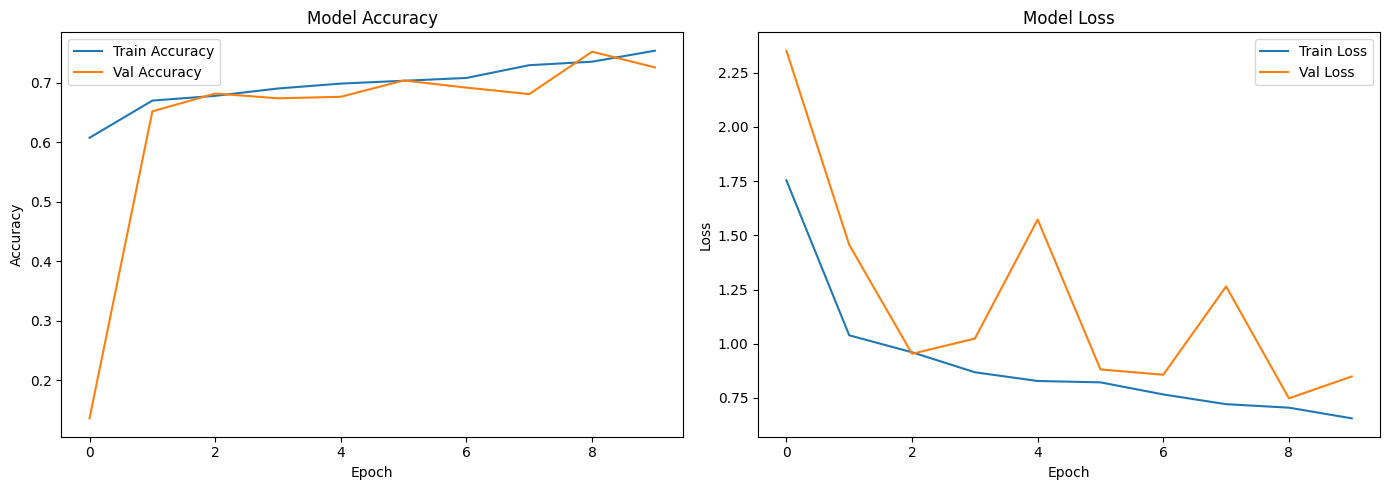

In [16]:
# Plot training & validation accuracy and loss over epochs
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Model Saving and Deployment
After training the CNN model on the HAM10000 skin lesion dataset, we save the trained model to disk for future deployment or inference.

We use the modern Keras .keras format recommended by TensorFlow for saving the full model, including:

Model architecture

Trained weights

Optimizer state

Training configuration (loss, metrics, etc.)

In [19]:
# Save the CNN model using the modern Keras format
model.save("teledermatology_cnn_model.keras")
print("Model saved as teledermatology_cnn_model.keras")



Model saved as teledermatology_cnn_model.keras


###  Visualizing CNN Predictions

In this section, we use the trained CNN model to make predictions on unseen lesion images. Rather than displaying numerical class indices (e.g., `1`), we convert them back to their actual label names (e.g., `'nv'`, `'mel'`, etc.) for interpretability. The predicted label is shown alongside the image for visual confirmation.


Model reloaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predicted class index: 1
Predicted label: bcc


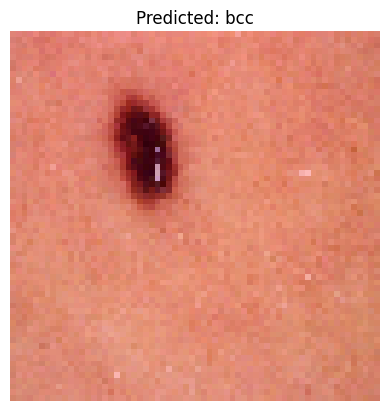

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved CNN model
model = load_model("teledermatology_cnn_model.keras")
print("Model reloaded successfully.")

# Load one image from the validation set
sample_path = val_df['image_path'].values[0]  # You can replace [0] to try other samples

# Preprocess the image
img = image.load_img(sample_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Map numeric label to original string label
label_map = dict(enumerate(metadata['dx'].astype('category').cat.categories))  # Make sure this line exists somewhere earlier or above
predicted_label = label_map[predicted_class_index]

# Show results
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted label: {predicted_label}")

# Display image with label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()



In [27]:
import random
import matplotlib.pyplot as plt

def show_predictions_grid(model, val_df, true_labels_col='label', num_images=9):
    """
    Displays a grid of images with predicted vs. true labels.

    Args:
        model: Trained Keras CNN model.
        val_df: DataFrame with 'image_path' and 'label_str'.
        true_labels_col: Column name for true labels (default: 'label').
        num_images: Total number of images to display (default: 9).
    """
    sample_df = val_df.sample(n=num_images).reset_index(drop=True)
    label_map = dict(enumerate(metadata['dx'].astype('category').cat.categories))
    true_label_map = dict(zip(metadata['label_str'], metadata['dx']))

    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        img_path = sample_df['image_path'][i]
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_label = label_map[predicted_class_index]
        true_label_str = sample_df['label_str'][i]
        true_label = true_label_map[true_label_str]

        plt.subplot(int(np.sqrt(num_images)), int(np.ceil(num_images/np.sqrt(num_images))), i + 1)
        plt.imshow(img)
        plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


## Final Evaluation Summary & Recommendations
Summary:
This notebook presented two key modeling approaches for classifying skin lesion types from the HAM10000 dataset:

Baseline Models Using Metadata

Logistic Regression and Random Forest models were trained on structured metadata features (e.g., age, sex, localization).

The Random Forest outperformed Logistic Regression with:

Accuracy: 72% (vs 71%)

Weighted F1-Score: 0.69 (vs 0.66)

However, both models struggled with class imbalance and minority class detection (e.g., class 4 and 6 had poor recall).

Convolutional Neural Network (CNN) Using Image Data

A CNN was built and trained for 10 epochs on lesion images.

The training and validation accuracy curves showed steady learning without severe overfitting.

CNN models capture spatial patterns in skin lesions better than metadata alone and showed promise for generalizing across lesion classes.

